In [36]:
import numpy as np
import matplotlib.pyplot as plt
import winnt

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int8
이 이미지 데이터의 레이블은 5이다


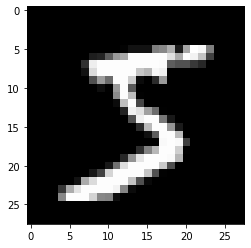

In [53]:
mnist.data.iloc[1].to_numpy()
mnist.target[0]

mnist.target = mnist.target.astype(np.int8)

X = mnist.data/255
y = mnist.target
print(y)
#plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.imshow(X.iloc[0].to_numpy().reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

In [76]:
#2. 훈련 데이터와 테스트 데이터의 분리
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=0)
X_train = torch.Tensor(X_train.to_numpy())
X_test = torch.Tensor(X_test.to_numpy())
y_train= torch.Tensor(y_train.to_numpy()).type(torch.LongTensor)
y_test = torch.Tensor(y_test.to_numpy()).type(torch.LongTensor)


ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [66]:
print(len(X_train))
print(len(y_train))


60000
60000


In [77]:
#3. 다층 퍼셉트론
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100,100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100,10))

print(model)


Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [78]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [79]:
def train(epoch):
    model.train()

    for data, targets in loader_train:
        optimizer.zero_grad() # grad를 0으로 초기화
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

    print("epoch {} finished\n".format(epoch))

def test():
    model.eval() #신경망을 추론모드로 전환
    correct = 0

    #데이터로더에서 미니배치를 하나씩 꺼내 추론 수행

    with torch.no_grad():
        for data, target in loader_test:
            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1) #확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(target.data.view_as(predicted)).sum() #정답과 일치한 경우 정답 카운트를 증가

    #정확도 출력
    data_num = len(loader_test.dataset) #데이터 종 건수
    print('\n테스트 데이터에서 예측 정확도 : {}/{} ({:.0f}%)\n'.format(correct, data_num, 100 * correct/data_num))

In [59]:
test()



테스트 데이터에서 예측 정확도 : 942/10000 (9%)



In [80]:
for epoch in range(3):
    train(epoch)

test()

epoch 0 finished

epoch 1 finished

epoch 2 finished


테스트 데이터에서 예측 정확도 : 9577/10000 (96%)

